<a href="https://colab.research.google.com/github/nvj1d/ML/blob/main/TP1_prog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
np.random.seed(42)
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

In [ ]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"% (n_digits, n_samples, n_features))
print(82 * '_')

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
def bench_k_means(estimator, name, data):
  t0 = time()
  estimator.fit(data)
  print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'% (name, (time() - t0), estimator.inertia_,metrics.homogeneity_score(labels, estimator.labels_),metrics.completeness_score(labels, estimator.labels_),metrics.v_measure_score(labels, estimator.labels_),metrics.adjusted_rand_score(labels, estimator.labels_),metrics.adjusted_mutual_info_score(labels,estimator.labels_),metrics.silhouette_score(data, estimator.labels_,metric='euclidean',sample_size=sample_size)))
  bench_k_means(KMeans(init='k-means++', n_clusters=n_digits,n_init=10), name="k-means++", data=data)
  bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),name="random", data=data)
# in this case the seeding of the centers is deterministic, hence
# we run the kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits,n_init=1),name="PCA-based",data=data)
print(82 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
PCA-based	0.14s	70804	0.671	0.698	0.684	0.561	0.681	0.111
k-means++	0.49s	69662	0.681	0.720	0.700	0.573	0.697	0.127
k-means++	0.77s	69658	0.678	0.718	0.698	0.568	0.694	0.147
k-means++	0.35s	69424	0.602	0.651	0.625	0.464	0.621	0.137
k-means++	0.65s	69450	0.602	0.650	0.625	0.467	0.621	0.137
k-means++	0.36s	70532	0.586	0.692	0.634	0.487	0.631	0.125
k-means++	0.65s	69484	0.614	0.661	0.637	0.484	0.633	0.134
k-means++	1.02s	69750	0.673	0.720	0.696	0.560	0.693	0.134
k-means++	0.45s	69702	0.664	0.707	0.685	0.545	0.682	0.122
k-means++	0.57s	69692	0.676	0.715	0.695	0.566	0.692	0.129
k-means++	0.65s	69674	0.671	0.711	0.690	0.556	0.687	0.119
k-means++	0.40s	69559	0.596	0.642	0.618	0.463	0.614	0.129
k-means++	0.37s	69601	0.601	0.682	0.639	0.482	0.635	0.143
k-means++	0.73s	69539	0.594	0.641	0.617	0.463	0.613	0.144
k

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-a7db479aa14f>", line 14, in <module>
    bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits,n_init=1),name="PCA-based",data=data)
  File "<ipython-input-19-a7db479aa14f>", line 9, in bench_k_means
    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits,n_init=10), name="k-means++", data=data)
  File "<ipython-input-19-a7db479aa14f>", line 9, in bench_k_means
    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits,n_init=10), name="k-means++", data=data)
  File "<ipython-input-19-a7db479aa14f>", line 9, in bench_k_means
    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits,n_init=10), name="k-means++", data=data)
  [Previous line repeated 155 more times]
  File "<ipython-input-19-a7db479aa14f>", line 7, in bench_k_means
    estimator.fi

KeyboardInterrupt: ignored

In [ ]:
################################################################
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02 # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))

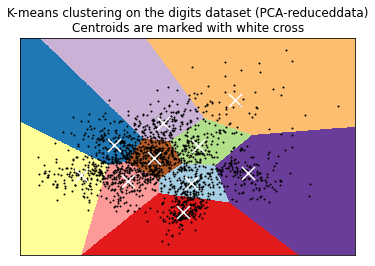

In [ ]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',

extent=(xx.min(), xx.max(), yy.min(), yy.max()),
cmap=plt.cm.Paired,
aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3,color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduceddata)\n''Centroids are marked with white cross')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()